# Triple linear regression model (3 combinations)

Split data into training (80%) and testing (20%) set.
Build 3 models using different combinations of predictors.
Plot your model (label axis, title, best-fit, easy visualization).
calculate MSE and R^2 for each model (both training and testing set).
Check VALIDITY (e.g. multicollinearity, violation of constant variance, outliers) for each of your model (do transformation if needed).

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("cleaned_dataset.csv")

In [3]:
data.describe() # needed to get the min and max for each thing

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.940000e+02,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,4.782378e+09,8030.912752,5.772170,0.113737,1.580000,0.596745,3.512718,0.001689,22.253915,14.262864,202.733781,969.605145,2334.772931
std,2.434238e+09,4904.332852,3.816237,0.635163,2.704044,0.896373,1.942749,0.007524,33.317996,20.251145,102.564675,289.746307,714.929899
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,4505.250000,3.085000,0.000000,0.000000,0.000000,2.202500,0.000000,0.000000,0.000000,140.000000,725.250000,1849.250000
50%,4.445115e+09,7818.500000,5.440000,0.000000,0.340000,0.275000,3.510000,0.000000,6.000000,8.000000,205.000000,1038.500000,2187.500000
75%,6.962181e+09,10977.500000,7.800000,0.000000,2.197500,0.830000,4.877500,0.000000,34.000000,20.000000,269.750000,1201.000000,2809.750000
max,8.877689e+09,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [4]:
#set random_state to get the same split every time
train, test = train_test_split(data, test_size=0.2, random_state=42)

print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(train.shape))
print("Shape of test dataset is: {0}".format(test.shape))

Shape of full dataset is: (894, 14)
Shape of training dataset is: (715, 14)
Shape of test dataset is: (179, 14)


# 1st Combination:

In [5]:
#extracting the right data
X_train1 = train[['TotalDistance', 'VeryActiveMinutes', 'TotalSteps']] # X1, X2, X3
Y_train1 = train['Calories']

X_test1 = test[['TotalDistance', 'VeryActiveMinutes', 'TotalSteps']] # X1, X2, X3
Y_test1 = test['Calories']

In [6]:
# training the model
regression = LinearRegression()
regression.fit(X_train1, Y_train1)
predicted_y = regression.predict(X_test1)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1883.428645459298
Coefficients: 
 [ 3.20551020e+02  7.08453837e+00 -1.94749762e-01]


In [7]:
# calculating error 
r2_test = regression.score(X_test1, Y_test1)
r2_train = regression.score(X_train1, Y_train1)
mse_test = mean_squared_error(predicted_y, Y_test1)
mse_train = mean_squared_error(Y_train1, regression.predict(X_train1))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 2.5472e+05
MSE of train data = 2.3467e+05
R^2 of Test = 0.47884
R^2 of Train = 0.54512


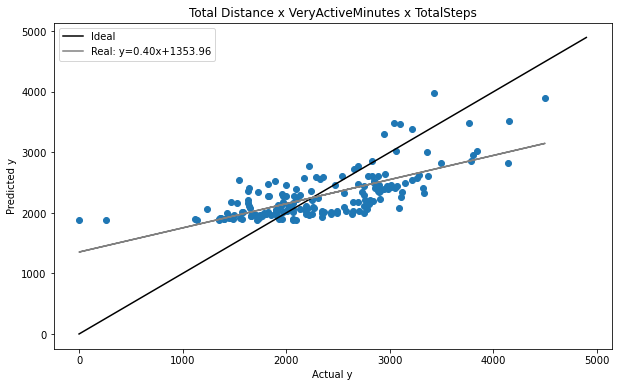

In [8]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test1, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance x VeryActiveMinutes x TotalSteps")

# plotting the best fit line
m, b = np.polyfit(Y_test1, predicted_y, 1)
ax.plot(Y_test1, m*Y_test1 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

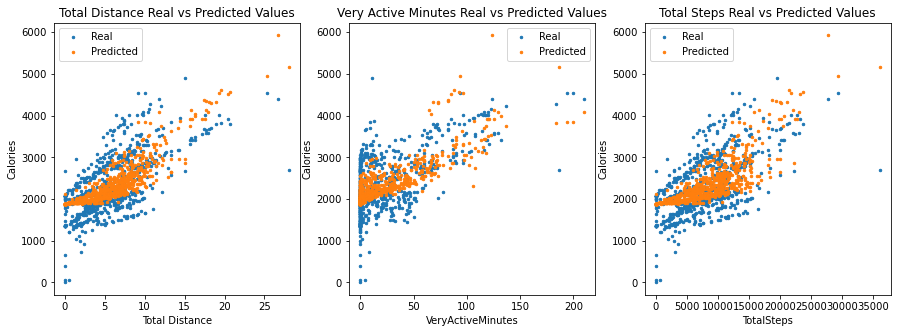

In [9]:
# plotting the actual data

Y_predict = regression.predict(X_train1)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(X_train1['TotalDistance'], Y_train1, s = 6, label = "Real")
ax[0].scatter(X_train1['TotalDistance'], Y_predict, s = 6, label = "Predicted")
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel('Calories')
ax[0].set_title('Total Distance Real vs Predicted Values')
ax[0].legend()

ax[1].scatter(X_train1['VeryActiveMinutes'], Y_train1, s = 6, label = "Real")
ax[1].scatter(X_train1['VeryActiveMinutes'], Y_predict, s = 6, label = "Predicted")
ax[1].set_xlabel('VeryActiveMinutes')
ax[1].set_ylabel('Calories')
ax[1].set_title('Very Active Minutes Real vs Predicted Values')
ax[1].legend()

ax[2].scatter(X_train1['TotalSteps'], Y_train1, s = 6, label = "Real")
ax[2].scatter(X_train1['TotalSteps'], Y_predict, s = 6, label = "Predicted")
ax[2].set_xlabel('TotalSteps')
ax[2].set_ylabel('Calories')
ax[2].set_title('Total Steps Real vs Predicted Values')
ax[2].legend()

Cited Sources: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

# 2nd Combination:

In [10]:
#extracting the right data
# Very Active Distance had a very high positive correlation with the other 2
X_train2 = train[['TotalDistance', 'VeryActiveDistance', 'TotalSteps']] # X1, X2, X3
Y_train2 = train['Calories']

X_test2 = test[['TotalDistance', 'VeryActiveDistance', 'TotalSteps']] # X1, X2, X3
Y_test2 = test['Calories']

In [11]:
# training the model
regression = LinearRegression()
regression.fit(X_train2, Y_train2)
predicted_y = regression.predict(X_test2)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1719.7388698200953
Coefficients: 
 [ 4.82065701e+02 -7.59840185e+01 -2.55192049e-01]


In [12]:
# calculating error 
r2_test = regression.score(X_test2, Y_test2)
r2_train = regression.score(X_train2, Y_train2)
mse_test = mean_squared_error(predicted_y, Y_test2)
mse_train = mean_squared_error(Y_train2, regression.predict(X_train2))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 2.7724e+05
MSE of train data = 2.5123e+05
R^2 of Test = 0.43276
R^2 of Train = 0.51302


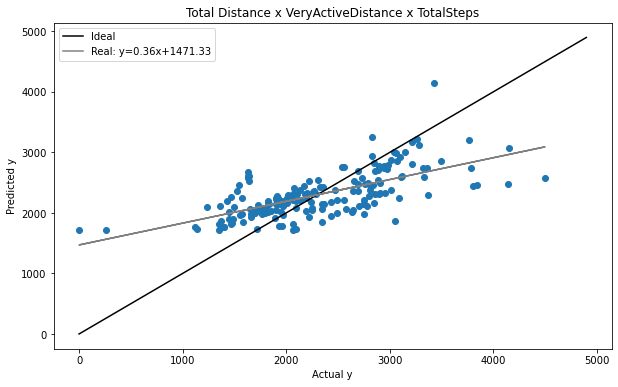

In [13]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test2, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance x VeryActiveDistance x TotalSteps")

# plotting the best fit line
m, b = np.polyfit(Y_test2, predicted_y, 1)
ax.plot(Y_test2, m*Y_test2 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

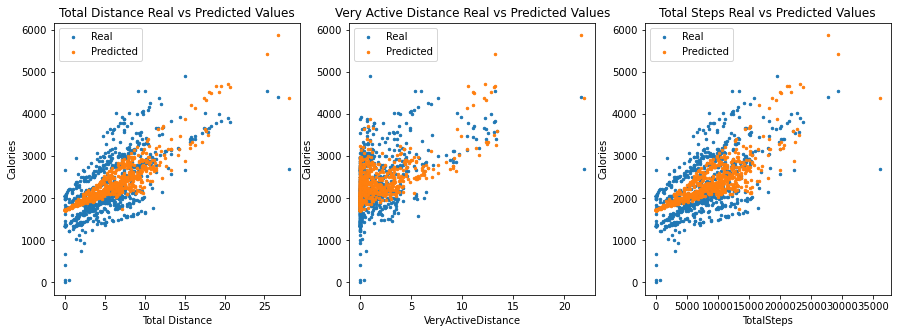

In [14]:
# plotting the actual data

Y_predict = regression.predict(X_train2)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(X_train2['TotalDistance'], Y_train2, s = 6, label = "Real")
ax[0].scatter(X_train2['TotalDistance'], Y_predict, s = 6, label = "Predicted")
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel('Calories')
ax[0].set_title('Total Distance Real vs Predicted Values')
ax[0].legend()

ax[1].scatter(X_train2['VeryActiveDistance'], Y_train2, s = 6, label = "Real")
ax[1].scatter(X_train2['VeryActiveDistance'], Y_predict, s = 6, label = "Predicted")
ax[1].set_xlabel('VeryActiveDistance')
ax[1].set_ylabel('Calories')
ax[1].set_title('Very Active Distance Real vs Predicted Values')
ax[1].legend()

ax[2].scatter(X_train2['TotalSteps'], Y_train2, s = 6, label = "Real")
ax[2].scatter(X_train2['TotalSteps'], Y_predict, s = 6, label = "Predicted")
ax[2].set_xlabel('TotalSteps')
ax[2].set_ylabel('Calories')
ax[2].set_title('Total Steps Real vs Predicted Values')
ax[2].legend()

# 3rd Combination:

In [15]:
#extracting the right data
# this extra feature was negtively correlated with calories
X_train3 = train[['TotalDistance', 'SedentaryMinutes', 'TotalSteps']] # X1, X2, X3
Y_train3 = train['Calories']

X_test3 = test[['TotalDistance', 'SedentaryMinutes', 'TotalSteps']] # X1, X2, X3
Y_test3 = test['Calories']

In [16]:
# training the model
regression = LinearRegression()
regression.fit(X_train3, Y_train3)
predicted_y = regression.predict(X_test3)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 1831.7334767778823
Coefficients: 
 [ 3.68618765e+02 -2.35137186e-02 -2.00125405e-01]


In [17]:
# calculating error 
r2_test = regression.score(X_test3, Y_test3)
r2_train = regression.score(X_train3, Y_train3)
mse_test = mean_squared_error(predicted_y, Y_test3)
mse_train = mean_squared_error(Y_train2, regression.predict(X_train3))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 2.8884e+05
MSE of train data = 2.6414e+05
R^2 of Test = 0.40903
R^2 of Train = 0.48798


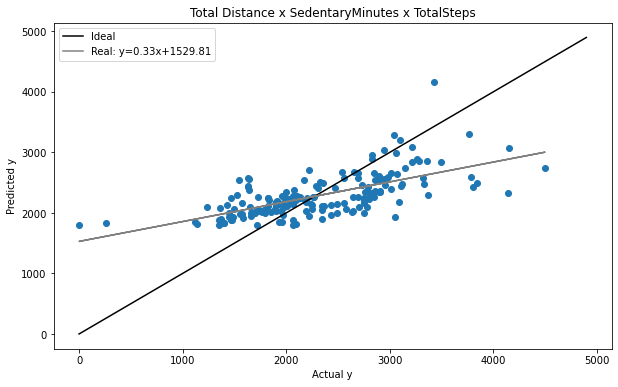

In [18]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test3, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance x SedentaryMinutes x TotalSteps")

# plotting the best fit line
m, b = np.polyfit(Y_test3, predicted_y, 1)
ax.plot(Y_test3, m*Y_test3 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

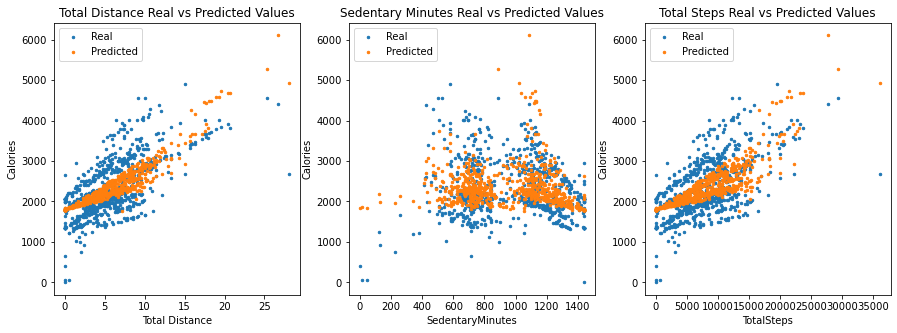

In [19]:
# plotting the actual data

Y_predict = regression.predict(X_train3)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(X_train3['TotalDistance'], Y_train3, s = 6, label = "Real")
ax[0].scatter(X_train3['TotalDistance'], Y_predict, s = 6, label = "Predicted")
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel('Calories')
ax[0].set_title('Total Distance Real vs Predicted Values')
ax[0].legend()

ax[1].scatter(X_train3['SedentaryMinutes'], Y_train3, s = 6, label = "Real")
ax[1].scatter(X_train3['SedentaryMinutes'], Y_predict, s = 6, label = "Predicted")
ax[1].set_xlabel('SedentaryMinutes')
ax[1].set_ylabel('Calories')
ax[1].set_title('Sedentary Minutes Real vs Predicted Values')
ax[1].legend()

ax[2].scatter(X_train3['TotalSteps'], Y_train3, s = 6, label = "Real")
ax[2].scatter(X_train3['TotalSteps'], Y_predict, s = 6, label = "Predicted")
ax[2].set_xlabel('TotalSteps')
ax[2].set_ylabel('Calories')
ax[2].set_title('Total Steps Real vs Predicted Values')
ax[2].legend()